In [1]:
import keras
import cv2
import numpy as np
import cv2
import os
import glob
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
def image_to_features(image,size=(32,32)):
    return cv2.resize(image,size).flatten()
    

In [3]:
img_dir = "Path here..." # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
labels = []
for (i,f1) in enumerate(files):
    img = cv2.imread(f1)
    features = image_to_features(img)
    data.append(features)
    label = f1.split(os.path.sep)[-1].split(".")[0]
    labels.append(label)
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(f1)))

[INFO] processed 1000/43
[INFO] processed 2000/43
[INFO] processed 3000/42
[INFO] processed 4000/42
[INFO] processed 5000/42
[INFO] processed 6000/42
[INFO] processed 7000/42
[INFO] processed 8000/42
[INFO] processed 9000/42
[INFO] processed 10000/42
[INFO] processed 11000/42
[INFO] processed 12000/42
[INFO] processed 13000/43
[INFO] processed 14000/43
[INFO] processed 15000/43
[INFO] processed 16000/42
[INFO] processed 17000/42
[INFO] processed 18000/42
[INFO] processed 19000/42
[INFO] processed 20000/42
[INFO] processed 21000/42
[INFO] processed 22000/42
[INFO] processed 23000/42
[INFO] processed 24000/42


In [4]:
print (len(data))
print (len(labels))

25000
25000


In [5]:
print (data[0])
print (labels[0])
print (data[12500])
print (labels[12500])

[ 93 171 210 ...   1   3   3]
cat
[128 112 115 ...  82  77  68]
dog


In [6]:
#Integer Encoding
labels = np.array(labels)
le = preprocessing.LabelEncoder()
labels_integer_encoded = le.fit_transform(labels)



In [7]:
#Binary Encoding
onehot_encoder = OneHotEncoder(sparse=False)
labels_integer_encoded = labels_integer_encoded.reshape(len(labels_integer_encoded),1)
labels_onehot_encoded = onehot_encoder.fit_transform(labels_integer_encoded)
#print(labels_onehot)

In [8]:
data = np.array(data) / 255.0 

In [9]:
print (labels_onehot_encoded)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
(trainData, valData, trainLabels, valLabels) = train_test_split(data, labels_onehot_encoded, test_size=0.25, random_state=42)

In [30]:
#A simple Network architecture
model = Sequential()
model.add(Dense(768,input_dim=3072,init="uniform",activation="relu"))
model.add(Dense(384, activation="relu", kernel_initializer="uniform"))
model.add(Dense(2))
model.add(Activation("softmax"))

C:\Users\shk1ply\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(768, kernel_initializer="uniform", activation="relu", input_dim=3072)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
print("[INFO] compiling model...")
sgd = SGD(lr=0.01,momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=sgd,metrics=["accuracy"])
history = model.fit(trainData, trainLabels, epochs=50, batch_size=128,verbose=1,validation_data=(valData,valLabels))

[INFO] compiling model...
Train on 18750 samples, validate on 6250 samples
Epoch 1/50
18750/18750 [==============================] - 9s 462us/step - loss: 0.6764 - acc: 0.5764 - val_loss: 0.6483 - val_acc: 0.6178
Epoch 2/50
18750/18750 [==============================] - 6s 315us/step - loss: 0.6422 - acc: 0.6257 - val_loss: 0.6436 - val_acc: 0.6208
Epoch 3/50
18750/18750 [==============================] - 6s 304us/step - loss: 0.6315 - acc: 0.6395 - val_loss: 0.6404 - val_acc: 0.6357
Epoch 4/50
18750/18750 [==============================] - 6s 301us/step - loss: 0.6204 - acc: 0.6481 - val_loss: 0.6495 - val_acc: 0.6162
Epoch 5/50
18750/18750 [==============================] - 5s 252us/step - loss: 0.6124 - acc: 0.6613 - val_loss: 0.6478 - val_acc: 0.6202
Epoch 6/50
18750/18750 [==============================] - 5s 248us/step - loss: 0.5955 - acc: 0.6747 - val_loss: 0.6487 - val_acc: 0.6267
Epoch 7/50
18750/18750 [==============================] - 5s 250us/step - loss: 0.5871 - acc: 0.6

In [32]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(valData, valLabels,batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
 
# dump the network architecture and weights to file
print("[INFO] dumping architecture and weights to file...")
model.save('dog_and_cat_simple_nn.h5')

[INFO] evaluating on testing set...
6250/6250 [==============================] - 1s 160us/step
[INFO] loss=1.1090, accuracy: 63.7920%
[INFO] dumping architecture and weights to file...


dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


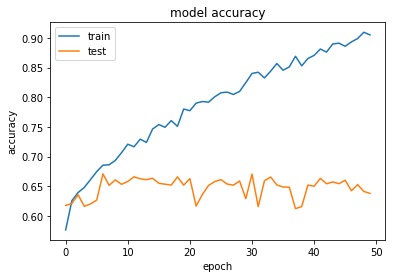

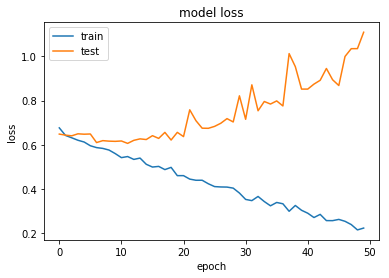

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test 

[INFO] loading network architecture and weights...
[0.9929598  0.00704018]
[[0.9929598  0.00704018]]
0


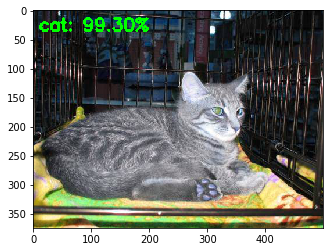

[INFO] Predicted: 0, Actual: 0


In [34]:
# initialize the class labels for the Kaggle dogs vs cats dataset
CLASSES = ["cat", "dog"]
 
# load the network
print("[INFO] loading network architecture and weights...")
model = load_model('dog_and_cat_simple_nn.h5')
#print("[INFO] testing on images in {}".format(args["test_images"]))
#Testing on one test image
test_image = cv2.imread('Path Here... + /3220.jpg')
test_features = image_to_features(test_image)/255.0
test_features = np.array([test_features])
probs = model.predict(test_features)[0]
print (probs)
#Just for printing actual return shape of predict method
prb = model.predict(test_features)
print (prb)
prediction = probs.argmax(axis=0)
print (prediction)
test_label = "{}: {:.2f}%".format(CLASSES[prediction],probs[prediction] * 100)
cv2.putText(test_image, test_label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 255, 0), 3)

plt.imshow(test_image,cmap='gray')
plt.show()
print("[INFO] Predicted: {}, Actual: {}".format(prediction,np.argmax(test_label)))



# Lession from this Notebook

1. My model has no depth. It is very basic
2. I have not used any regularization techniques and my learning rate is high (I have kept it high deliberately) and that is why SGD jumps too far and misses local minima.

This also indicates that the model is overfitting. It continues to get better and better at fitting the data that it sees (training data) while getting worse and worse at fitting the data that it does not see (validation data).

